In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from matplotlib.axis import Axis
import matplotlib.ticker
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats

In [2]:
apple_stock_daily = pd.read_csv("resources/apple_stock_daily.csv", index_col = "Unnamed: 0")
apple_stock_daily

,Date,Open,High,Close,Adjusted Close,Volume,Dividends
0,2018-05-10,187.740,190.37,190.04,45.288145,27989289.0,0.00
1,2018-05-11,189.490,190.06,188.59,45.116563,26212221.0,0.73
2,2018-05-14,189.010,189.53,188.15,45.011301,20778772.0,0.00
3,2018-05-15,186.780,187.07,186.44,44.602216,23695159.0,0.00
4,2018-05-16,186.070,188.46,188.18,45.018478,19183064.0,0.00
...,...,...,...,...,...,...,...
1252,2023-05-02,170.090,170.35,168.54,168.540000,48425696.0,0.00
1253,2023-05-03,169.500,170.92,167.45,167.450000,65136018.0,0.00
1254,2023-05-04,164.890,167.04,165.79,165.790000,81235427.0,0.00
1255,2023-05-05,170.975,174.30,173.57,173.570000,113453171.0,0.00


In [3]:
motorola_stock_daily = pd.read_csv("resources/motorola_stock_daily.csv", index_col = "Unnamed: 0")
motorola_stock_daily

,Date,Open,High,Close,Adjusted Close,Volume,Dividends
0,2018-05-10,106.32,108.9200,108.75,100.779125,1517801.0,0.0
1,2018-05-11,108.59,108.6700,108.37,100.426977,1065483.0,0.0
2,2018-05-14,108.43,109.3400,107.38,99.509540,1239310.0,0.0
3,2018-05-15,107.02,108.0600,107.98,100.065562,1145615.0,0.0
4,2018-05-16,107.92,108.3500,107.30,99.435403,968471.0,0.0
...,...,...,...,...,...,...,...
1252,2023-05-02,293.94,294.6575,293.16,293.160000,665788.0,0.0
1253,2023-05-03,295.00,295.0000,288.62,288.620000,595591.0,0.0
1254,2023-05-04,288.13,292.6700,290.41,290.410000,968799.0,0.0
1255,2023-05-05,285.12,288.8600,281.56,281.560000,1501288.0,0.0


In [4]:
google_class_c_stock_daily = pd.read_csv("resources/google_class_c_stock_daily.csv", index_col = "Unnamed: 0")
google_class_c_stock_daily

,Date,Open,High,Close,Adjusted Close,Volume,Dividends
0,2018-05-10,1086.030,1100.44,1097.570,54.8785,1443025.0,0.0
1,2018-05-11,1093.600,1101.33,1098.260,54.9130,1253665.0,0.0
2,2018-05-14,1100.000,1110.75,1100.200,55.0100,1518077.0,0.0
3,2018-05-15,1090.000,1090.05,1079.230,53.9615,1494872.0,0.0
4,2018-05-16,1077.310,1089.27,1081.770,54.0885,1097317.0,0.0
...,...,...,...,...,...,...,...
1252,2023-05-02,107.660,107.73,105.980,105.9800,20343116.0,0.0
1253,2023-05-03,106.220,108.13,106.120,106.1200,17116333.0,0.0
1254,2023-05-04,106.160,106.30,105.210,105.2100,19780637.0,0.0
1255,2023-05-05,105.320,106.44,106.215,106.2150,20710627.0,0.0


In [5]:
google_class_a_stock_daily = pd.read_csv("resources/google_class_a_stock_daily.csv", index_col = "Unnamed: 0")
google_class_a_stock_daily

,Date,Open,High,Close,Adjusted Close,Volume,Dividends
0,2018-05-10,1095.000,1109.41,1105.47,55.2735,1820676.0,0.0
1,2018-05-11,1100.410,1109.01,1103.38,55.1690,1525218.0,0.0
2,2018-05-14,1105.570,1118.15,1106.60,55.3300,1966893.0,0.0
3,2018-05-15,1096.900,1099.12,1084.87,54.2435,1786926.0,0.0
4,2018-05-16,1085.090,1094.38,1084.09,54.2045,1281406.0,0.0
...,...,...,...,...,...,...,...
1252,2023-05-02,107.140,107.20,105.32,105.3200,30997245.0,0.0
1253,2023-05-03,105.530,107.49,105.41,105.4100,21795405.0,0.0
1254,2023-05-04,105.485,105.60,104.69,104.6900,23419506.0,0.0
1255,2023-05-05,104.820,105.88,105.57,105.5700,26639254.0,0.0


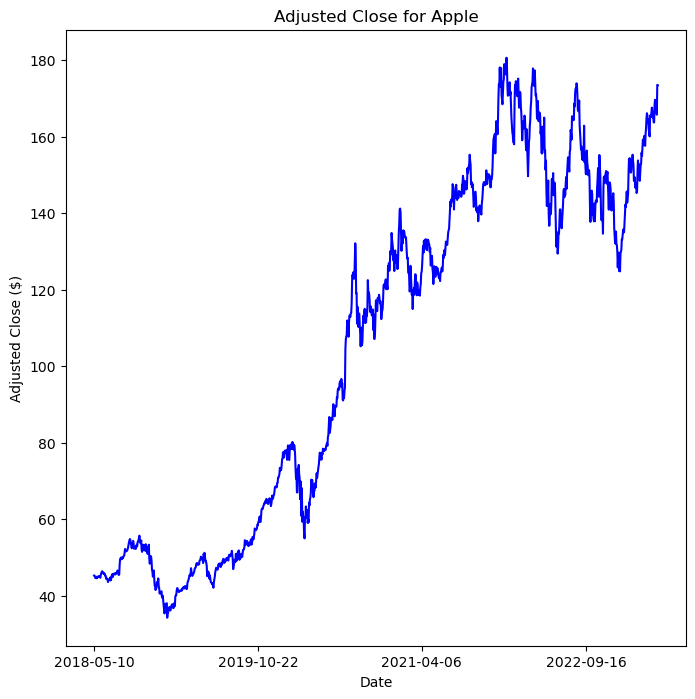

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(apple_stock_daily["Date"], apple_stock_daily["Adjusted Close"],
        label = "apple", color = "blue")
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
ax.xaxis.set_major_locator(locator)
plt.xlabel("Date")
plt.ylabel("Adjusted Close ($)")
plt.title("Adjusted Close for Apple")
plt.savefig("output/apple_adjust_close")
plt.show()

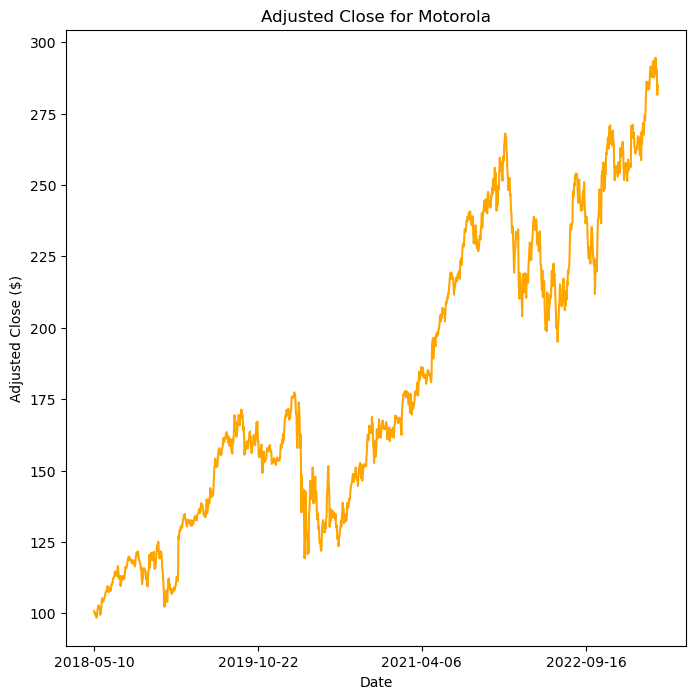

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(motorola_stock_daily["Date"], motorola_stock_daily["Adjusted Close"],
        label = "motorola", color = "orange")
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
ax.xaxis.set_major_locator(locator)
plt.xlabel("Date")
plt.ylabel("Adjusted Close ($)")
plt.title("Adjusted Close for Motorola")
plt.savefig("output/motorola_adjust_close")
plt.show()

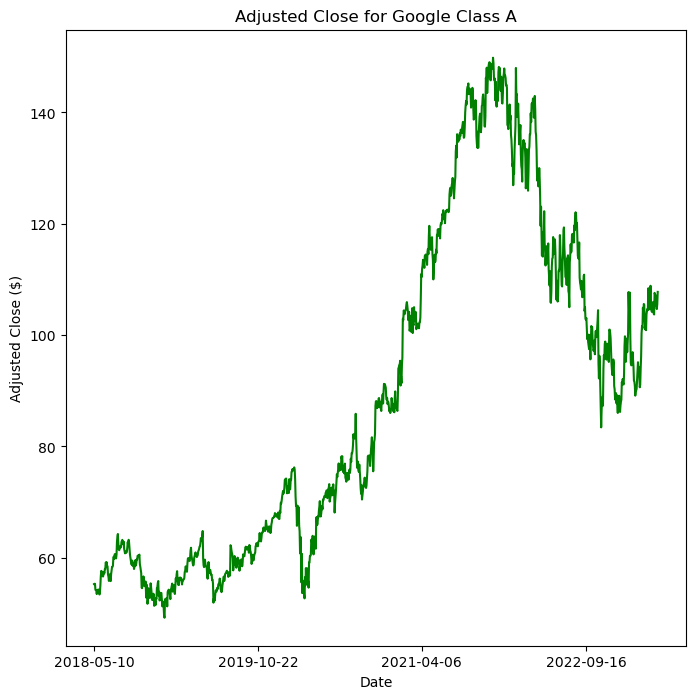

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(google_class_a_stock_daily["Date"], google_class_a_stock_daily["Adjusted Close"],
        label = "Google Class A", color = "green")
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
ax.xaxis.set_major_locator(locator)
plt.xlabel("Date")
plt.ylabel("Adjusted Close ($)")
plt.title("Adjusted Close for Google Class A")
plt.savefig("output/google_class_a_adjust_close")
plt.show()

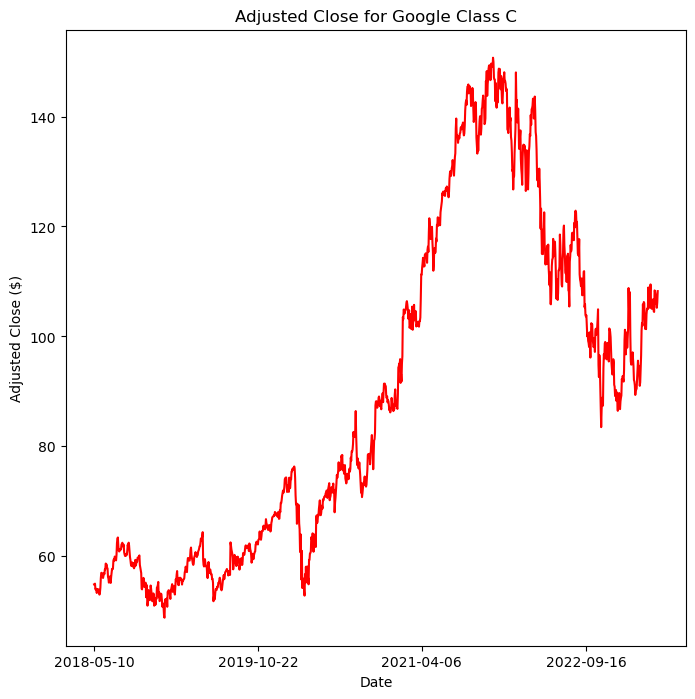

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(google_class_c_stock_daily["Date"], google_class_c_stock_daily["Adjusted Close"],
        label = "Google Class C", color = "red")
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
ax.xaxis.set_major_locator(locator)
plt.xlabel("Date")
plt.ylabel("Adjusted Close ($)")
plt.title("Adjusted Close for Google Class C")
plt.savefig("output/google_class_c_adjust_close")
plt.show()

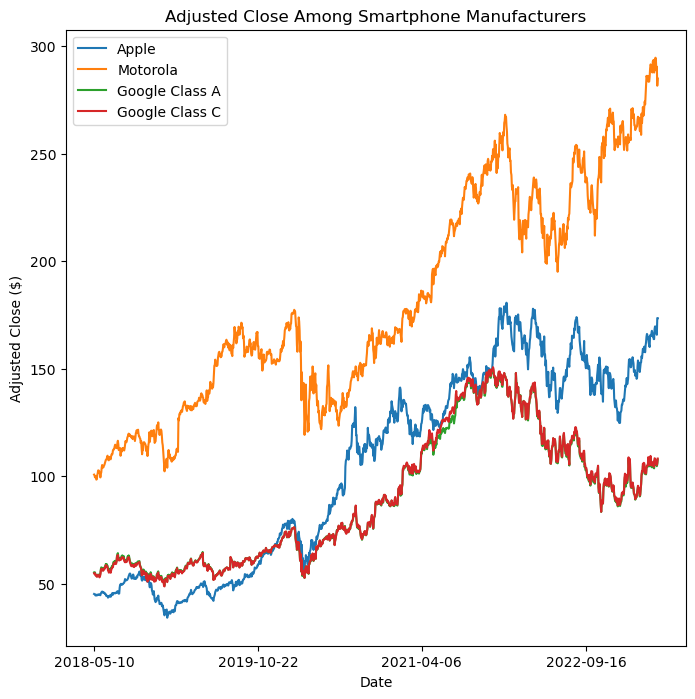

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(apple_stock_daily["Date"], apple_stock_daily["Adjusted Close"], label = "Apple")
ax.plot(motorola_stock_daily["Date"], motorola_stock_daily["Adjusted Close"], label = "Motorola")
ax.plot(google_class_a_stock_daily["Date"], google_class_a_stock_daily["Adjusted Close"], label = "Google Class A")
ax.plot(google_class_c_stock_daily["Date"], google_class_c_stock_daily["Adjusted Close"], label = "Google Class C")
# locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
# ax.xaxis.set_major_locator(locator)
years = mdates.YearLocator()
ax.xaxis.set_major_locator(years)
ax.legend()
plt.xlabel("Date")
plt.ylabel("Adjusted Close ($)")
plt.title("Adjusted Close Among Smartphone Manufacturers")
plt.savefig("output/adjusted_close_comparison")
plt.show()

In [11]:
# find percent changes
apple_pct_change = apple_stock_daily["Adjusted Close"].pct_change()
motorola_pct_change = motorola_stock_daily["Adjusted Close"].pct_change()
google_class_c_pct_change = google_class_c_stock_daily["Adjusted Close"].pct_change()
google_class_a_pct_change = google_class_a_stock_daily["Adjusted Close"].pct_change()

# find mean percent changes
apple_pct_change_mean = apple_pct_change.mean()
motorola_pct_change_mean = motorola_pct_change.mean()
google_class_c_pct_change_mean = google_class_c_pct_change.mean()
google_class_a_pct_change_mean = google_class_a_pct_change.mean()

# make mean percent changes list and manufacturers list
mean_pct_changes = [apple_pct_change_mean, motorola_pct_change_mean, 
                    google_class_c_pct_change_mean, google_class_a_pct_change_mean]

manufacturers = ["Apple", "Motorola", "Google Class C", "Google Class A"]

# Make summary dataframe and display it
summary_df = pd.DataFrame(list(zip(manufacturers, mean_pct_changes)),
               columns =['Manufacturer', 'Mean Percent Changes'])
summary_df

,Manufacturer,Mean Percent Changes
0,Apple,0.001290
1,Motorola,0.000999
2,Google Class C,0.000741
3,Google Class A,0.000732


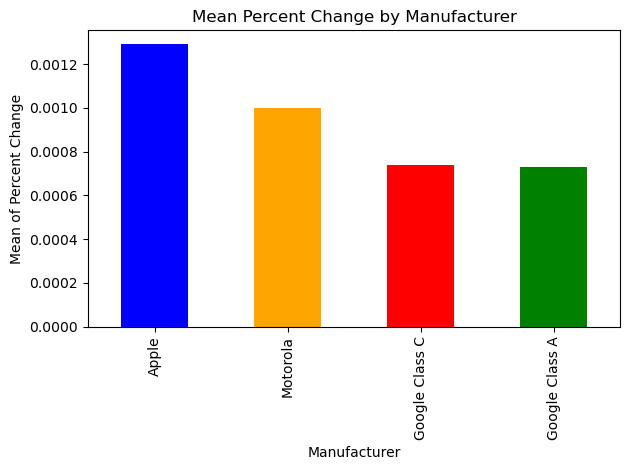

In [33]:
ax1 = summary_df.plot("Manufacturer", "Mean Percent Changes", kind = "bar",
                      legend = False, color = ["blue", "orange", "red", "green"])
ax1.set_ylabel("Mean of Percent Change")
ax1.set_title("Mean Percent Change by Manufacturer")
plt.tight_layout()
fig = ax1.get_figure()
fig.savefig('output/mean_percent_change_comparison')

In [13]:
# decide if apple percent changes were normal
statistic, p = stats.normaltest(apple_pct_change.dropna())
print(p)

2.868616623572276e-30


In [14]:
# decide if motorola percent changes were normal
statistic, p = stats.normaltest(motorola_pct_change.dropna())
print(p)

7.854824607046733e-47


In [15]:
# decide if google class a percent changes were normal
statistic, p = stats.normaltest(google_class_a_pct_change.dropna())
print(p)

9.281805760438544e-25


In [16]:
# decide if google class a percent changes were normal
statistic, p = stats.normaltest(google_class_c_pct_change.dropna())
print(p)

1.0516306045950953e-25


In [17]:
series = [apple_pct_change, motorola_pct_change, google_class_a_pct_change, google_class_c_pct_change]
percent_change_df = pd.concat(series, axis = 1)
percent_change_df = percent_change_df.set_axis(apple_stock_daily["Date"])
percent_change_df = percent_change_df.dropna()
percent_change_df.columns = ["Apple", "Motorola", "Google Class A", "Google Class C"]
percent_change_df

,Apple,Motorola,Google Class A,Google Class C
Date,,,,
2018-05-11,-0.003789,-0.003494,-0.001891,0.000629
2018-05-14,-0.002333,-0.009135,0.002918,0.001766
2018-05-15,-0.009088,0.005588,-0.019637,-0.019060
2018-05-16,0.009333,-0.006297,-0.000719,0.002354
2018-05-17,-0.006324,-0.009786,-0.002610,-0.002940
...,...,...,...,...
2023-05-02,-0.006191,-0.004787,-0.017537,-0.016062
2023-05-03,-0.006467,-0.015486,0.000855,0.001321
2023-05-04,-0.009913,0.006202,-0.006830,-0.008575


In [36]:
# found the standard deviations
percent_change_df.std()

Apple             0.020987
Motorola          0.018515
Google Class A    0.020028
Google Class C    0.020018
dtype: float64

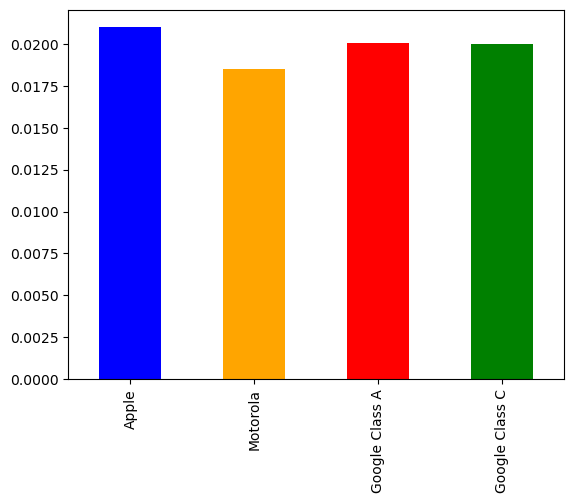

In [39]:
percent_change_df.std().plot(kind = "bar", color = ["blue", "orange", "red", "green"])
plt.savefig("output/standard_deviation_comparison")

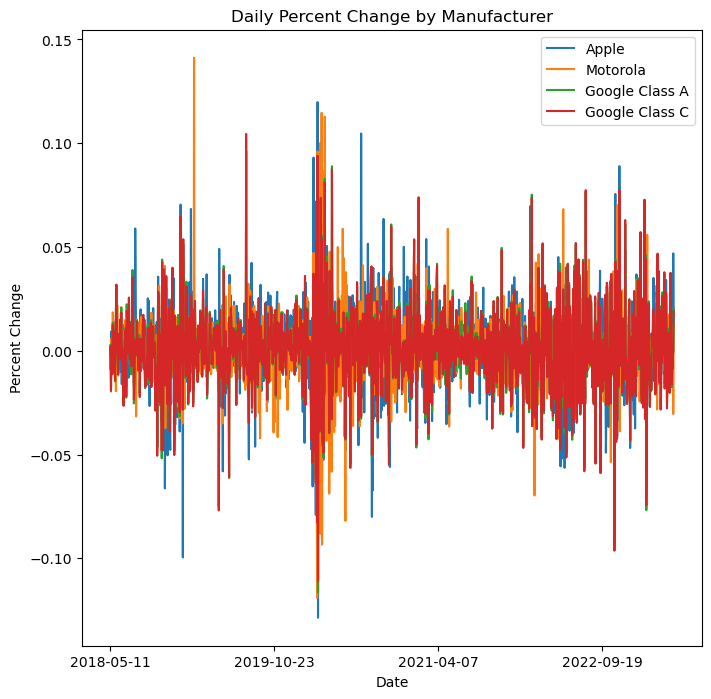

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(percent_change_df.index, percent_change_df["Apple"], label = "Apple")
ax.plot(percent_change_df.index, percent_change_df["Motorola"], label = "Motorola")
ax.plot(percent_change_df.index, percent_change_df["Google Class A"], label = "Google Class A")
ax.plot(percent_change_df.index, percent_change_df["Google Class C"], label = "Google Class C")
years = mdates.YearLocator()
ax.xaxis.set_major_locator(years)
ax.legend()
plt.xlabel("Date")
plt.ylabel("Percent Change")
plt.title("Daily Percent Change by Manufacturer")
plt.savefig("output/daily_percent_change_comparison")
plt.show()

In [19]:
stats.mannwhitneyu(percent_change_df["Apple"], percent_change_df["Motorola"])

MannwhitneyuResult(statistic=797017.0, pvalue=0.6499613296582236)

In [20]:
def pos_pct_change(pct_change_df):
    num_pos_pct_change = len(pct_change_df.loc[lambda x : x>0])
    num_neg_pct_change = len(pct_change_df.loc[lambda x : x<0])
    num_zero_pct_change = len(pct_change_df.loc[lambda x : x==0])
    return num_pos_pct_change / (num_neg_pct_change + num_pos_pct_change + num_zero_pct_change)

In [21]:
apple_pos_pct = pos_pct_change(apple_pct_change)
motorola_pos_pct = pos_pct_change(motorola_pct_change)
google_class_c_pos_pct = pos_pct_change(google_class_c_pct_change)
google_class_a_pos_pct = pos_pct_change(google_class_a_pct_change)

pos_pcts = [apple_pos_pct, motorola_pos_pct, google_class_c_pos_pct, google_class_a_pos_pct]

summary_df["Positive Pct. Change Relative Frequency"] = pos_pcts

In [22]:
summary_df

,Manufacturer,Mean Percent Changes,Positive Pct. Change Relative Frequency
0,Apple,0.001290,0.530255
1,Motorola,0.000999,0.543790
2,Google Class C,0.000741,0.531847
3,Google Class A,0.000732,0.522293


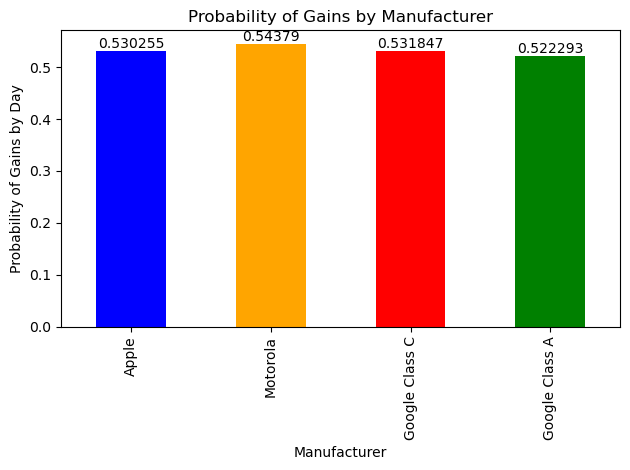

In [46]:
ax2 = summary_df.plot("Manufacturer", "Positive Pct. Change Relative Frequency", kind = "bar",
                      legend = False, color = ["blue", "orange", "red", "green"])
ax2.set_ylabel("Probability of Gains by Day")
ax2.set_title("Probability of Gains by Manufacturer")
ax2.bar_label(ax2.containers[0])
ax2.set_ylim=(0,.7)
plt.tight_layout()
plt.savefig("output/probabililty_of_gains_comparison")

In [24]:
# do a significance test on motorola and google class a percent change
successes = [len(motorola_pct_change.loc[lambda x : x>0]), len(google_class_a_pct_change.loc[lambda x : x>0])]
failures = [len(motorola_pct_change.loc[lambda x : x<0]), len(google_class_a_pct_change.loc[lambda x : x<0])]
zeros = [len(motorola_pct_change.loc[lambda x : x==0]), len(google_class_a_pct_change.loc[lambda x : x==0])]
total_counts = [successes[i]+failures[i]+zeros[i] for i in range(2)]
statistic, p_value = proportions_ztest(count=successes, nobs=total_counts, alternative='two-sided')
print(statistic)
print(p_value)

1.0797775337248732
0.28024125786764686


In [25]:
# do a significance test on whether motorola chance of increase is greater than 50%
proportions_ztest(count=successes[0], nobs=total_counts[0], value=0.5, alternative = "larger")

(3.1158019614203534, 0.0009172271234187638)

In [26]:
apple_net_income_df = pd.read_csv("resources/apple_net_income.csv", index_col = "Unnamed: 0")
apple_net_income_df

,Date,Net Income
0,2023-03-31,24160000000
1,2022-12-31,29998000000
2,2022-09-30,20721000000
3,2022-06-30,19442000000
4,2022-03-31,25010000000
5,2021-12-31,34630000000
6,2021-09-30,20551000000
7,2021-06-30,21744000000
8,2021-03-31,23630000000
9,2020-12-31,28755000000


In [27]:
motorola_net_income_df = pd.read_csv("resources/motorola_net_income.csv", index_col = "Unnamed: 0")
motorola_net_income_df

,Date,Net Income
0,2023-03-31,278000000
1,2022-12-31,589000000
2,2022-09-30,279000000
3,2022-06-30,228000000
4,2022-03-31,267000000
5,2021-12-31,401000000
6,2021-09-30,307000000
7,2021-06-30,293000000
8,2021-03-31,244000000
9,2020-12-31,412000000


In [28]:
google_class_c_net_income_df = pd.read_csv("resources/google_class_c_net_income.csv", index_col = "Unnamed: 0")
google_class_c_net_income_df

,Date,Net Income
0,2023-03-31,15051000000
1,2022-12-31,13624000000
2,2022-09-30,13910000000
3,2022-06-30,16002000000
4,2022-03-31,16436000000
5,2021-12-31,20642000000
6,2021-09-30,18936000000
7,2021-06-30,18525000000
8,2021-03-31,17930000000
9,2020-12-31,15227000000


In [29]:
google_class_a_net_income_df = pd.read_csv("resources/google_class_a_net_income.csv", index_col = "Unnamed: 0")
google_class_a_net_income_df

,Date,Net Income
0,2023-03-31,15051000000
1,2022-12-31,13624000000
2,2022-09-30,13910000000
3,2022-06-30,16002000000
4,2022-03-31,16436000000
5,2021-12-31,20642000000
6,2021-09-30,18936000000
7,2021-06-30,18525000000
8,2021-03-31,17930000000
9,2020-12-31,15227000000


In [30]:
net_income_df = pd.merge(apple_net_income_df, motorola_net_income_df, on = "Date")
net_income_df = pd.merge(net_income_df, google_class_c_net_income_df, on = "Date")
net_income_df.columns = ["Date", "Apple", "Motorola", "Google"]
net_income_df = net_income_df.sort_values(by = "Date")
net_income_df

,Date,Apple,Motorola,Google
19,2018-06-30,11519000000,180000000,3195000000
18,2018-09-30,14125000000,247000000,9192000000
17,2018-12-31,19965000000,423000000,8948000000
16,2019-03-31,11561000000,151000000,6657000000
15,2019-06-30,10044000000,207000000,9947000000
14,2019-09-30,13686000000,267000000,7068000000
13,2019-12-31,22236000000,244000000,10671000000
12,2020-03-31,11249000000,197000000,6836000000
11,2020-06-30,11253000000,135000000,6959000000
10,2020-09-30,12673000000,205000000,11247000000


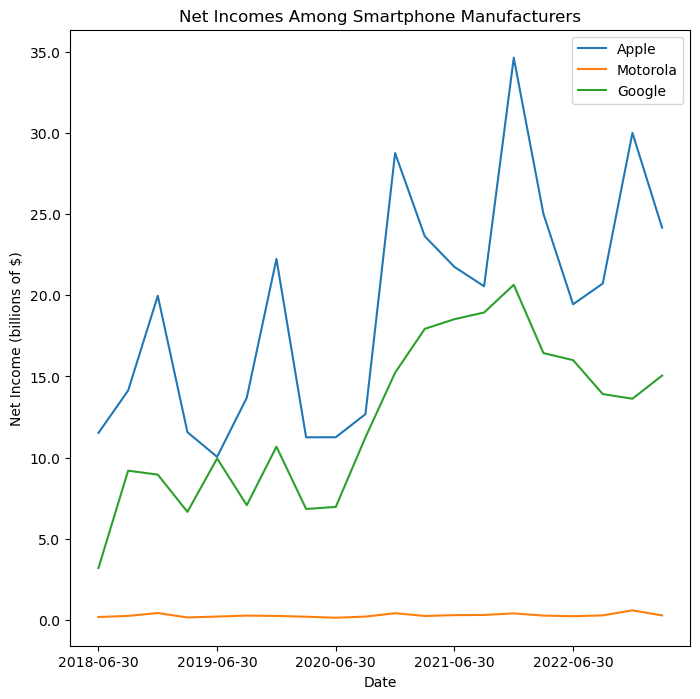

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(net_income_df["Date"], net_income_df["Apple"], label = "Apple")
ax.plot(net_income_df["Date"], net_income_df["Motorola"], label = "Motorola")
ax.plot(net_income_df["Date"], net_income_df["Google"], label = "Google")
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
ax.xaxis.set_major_locator(locator)
ax.legend()
plt.xlabel("Date")
plt.ylabel("Net Income (billions of $)")
plt.title("Net Incomes Among Smartphone Manufacturers")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x)/1000000000, ',')))
plt.savefig("output/net_income_comparison")
plt.show()

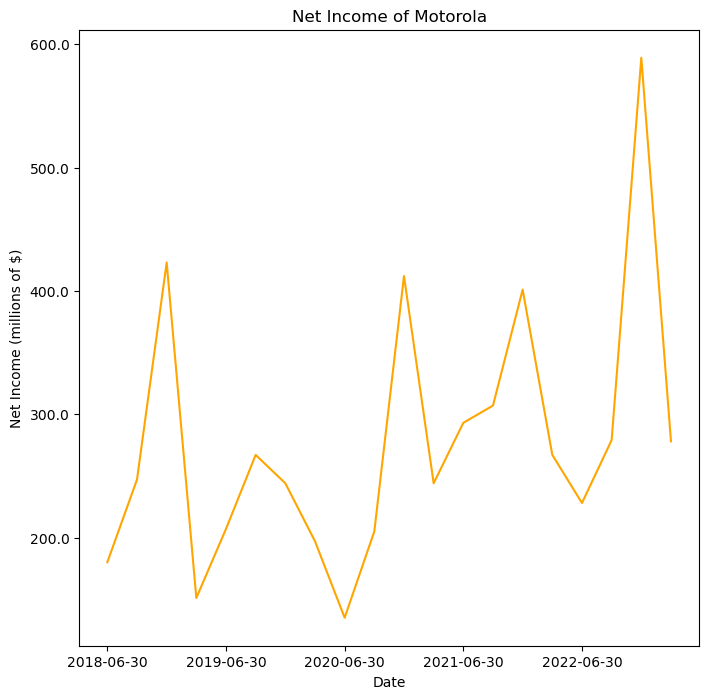

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(net_income_df["Date"], net_income_df["Motorola"], label = "Motorola", color = "orange")
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
ax.xaxis.set_major_locator(locator)
plt.xlabel("Date")
plt.ylabel("Net Income (millions of $)")
plt.title("Net Income of Motorola")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x)/1000000, ',')))
plt.savefig("output/motorola_net_income")
plt.show()